# Contents

#### 1. Prepare to work with data (import packages and set working directory)
#### 2. Read in and process data (create separate dataframes for gene expression data and phenotype data)
#### 3. Combine dataframes (with gene name as index)

## 1 - Prepare to work with data

### 1.1 - Import Packages

In [1]:
import os  # <- package used to work with system filepaths
import pandas as pd  # <- package used to import and organize data
import numpy as np  # <- package used to import and organize data
import math
import seaborn as sns  # <- package used to plot graphs
from matplotlib import pyplot as plt  # <- another package used to plot graphs
from itertools import cycle  # <- package used to iterate down rows
from ipywidgets import widgets  # <- widget tool to generate button
from IPython.display import display  # <- displays button
from tkinter import Tk, filedialog  # <- Tkinter is a GUI package
from tqdm.notebook import tqdm
import pingouin as pg
from pingouin import ttest
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
import requests
pd.set_option('display.max_columns', 50)
print("done step 1")

done step 1


C:\Users\chris\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


### 1.2 - Set working directory to where the CSV file with experiment data is


In [2]:
os.getcwd()
os.chdir('C:\\Users\\chris\\Desktop\\Rankin_Lab\\valid_data')

## 2 - Read in and tidy data


### 2.1.A - Read in and combine CeNGEN data into one dataframe (for dopaminergic (dopamine-synthesizing) neurons)

In [7]:
df1 = pd.read_csv('GenesExpressed_in_ADE-thrsUnfiltered.csv')
df2 = pd.read_csv('GenesExpressed_in_PDE-thrsUnfiltered.csv')
df3 = pd.read_csv('GenesExpressed_in_CEP-thrsUnfiltered.csv')

ExpressionData_DopaminergicNeurons = pd.merge(df1, df2, on='Gene name', how='outer')
ExpressionData_DopaminergicNeurons = pd.merge(ExpressionData_DopaminergicNeurons, df3, on='Gene name', how='outer')
ExpressionData_DopaminergicNeurons = ExpressionData_DopaminergicNeurons.drop(['Unnamed: 0_x','Gene ID_x', 'Unnamed: 0_y', 'Gene ID_y', 'Unnamed: 0'], axis=1)

# Rearrange columns
new_column_order = ['Gene name', 'ADE_exp_level', 'PDE_exp_level', 'CEP_exp_level']
ExpressionData_DopaminergicNeurons = ExpressionData_DopaminergicNeurons.reindex(columns=new_column_order)

# ExpressionData_DopaminergicNeurons = ExpressionData_DopaminergicNeurons.dropna()

# Save the merged DataFrame as a CSV file to a specific directory
ExpressionData_DopaminergicNeurons.to_csv('C:\\Users\\chris\\Desktop\\Rankin_Lab\\valid_data\\ExpressionData_DopaminergicNeurons.csv', index=False)


print(ExpressionData_DopaminergicNeurons.shape)
print(ExpressionData_DopaminergicNeurons.head())

(18475, 4)
  Gene name  ADE_exp_level  PDE_exp_level  CEP_exp_level
0    flp-33       98000.31       16699.05       1082.030
1    unc-54       77625.40       80205.59     133461.200
2  F09E10.7       59164.51      116352.90      84678.650
3     flp-9       40632.57         953.48        695.145
4   F59F3.6       27777.23       26628.37      16785.460


### 2.1.B - Read in and combine CeNGEN data into one dataframe (for all neurons with any type of dopamine receptor)

In [49]:
# Find out all neuron cell types expressing any type of dopamine receptor
df1 = pd.read_csv('GenesExpressing-dop-1-thrs4.csv')
df2 = pd.read_csv('GenesExpressing-dop-2-thrs4.csv')
df3 = pd.read_csv('GenesExpressing-dop-3-thrs4.csv')
df4 = pd.read_csv('GenesExpressing-dop-4-thrs4.csv')

DAReceptorNeurons = pd.concat([df1, df2], ignore_index=True)
DAReceptorNeurons = pd.concat([DAReceptorNeurons, df3], ignore_index=True)
DAReceptorNeurons = pd.concat([DAReceptorNeurons, df4], ignore_index=True)
DAReceptorNeurons = DAReceptorNeurons.groupby('Cell type', as_index=False).sum()
DAReceptorNeurons = DAReceptorNeurons.drop('Unnamed: 0', axis=1)


DAReceptorNeurons.to_csv('C:\\Users\\chris\\Desktop\\Rankin_Lab\\valid_data\\DAReceptorNeurons.csv', index=False)


print(DAReceptorNeurons)


   Cell type  Expression level
0        ADA           161.631
1        ADF           223.411
2        AIA           256.220
3        AIB           293.328
4        AIZ           187.111
..       ...               ...
58      VA12          1049.759
59        VB           430.456
60      VB01           500.016
61      VB02           329.589
62     VD_DD           137.819

[63 rows x 2 columns]


In [60]:
# Generate dataframe with expression levels for all these neurons
df1 = pd.read_csv('GenesExpressed_in_ADA-thrsUnfiltered.csv')
df1.rename(columns={'Expression level': 'ADA_exp_level'}, inplace=True)
df1 = df1.iloc[:, [1, 3]]

df2 = pd.read_csv('GenesExpressed_in_ADF-thrsUnfiltered.csv')
df2.rename(columns={'Expression level': 'ADF_exp_level'}, inplace=True)
df2 = df2.iloc[:, [1, 3]]

df3 = pd.read_csv('GenesExpressed_in_AIA-thrsUnfiltered.csv')
df3.rename(columns={'Expression level': 'AIA_exp_level'}, inplace=True)
df3 = df3.iloc[:, [1, 3]]

df4 = pd.read_csv('GenesExpressed_in_AIB-thrsUnfiltered.csv')
df4.rename(columns={'Expression level': 'AIB_exp_level'}, inplace=True)
df4 = df4.iloc[:, [1, 3]]

df5 = pd.read_csv('GenesExpressed_in_AIZ-thrsUnfiltered.csv')
df5.rename(columns={'Expression level': 'AIZ_exp_level'}, inplace=True)
df5 = df5.iloc[:, [1, 3]]

df6 = pd.read_csv('GenesExpressed_in_ALA-thrsUnfiltered.csv')
df6.rename(columns={'Expression level': 'ALA_exp_level'}, inplace=True)
df6 = df6.iloc[:, [1, 3]]

df7 = pd.read_csv('GenesExpressed_in_ALM-thrsUnfiltered.csv')
df7.rename(columns={'Expression level': 'ALM_exp_level'}, inplace=True)
df7 = df7.iloc[:, [1, 3]]

df8 = pd.read_csv('GenesExpressed_in_AS-thrsUnfiltered.csv')
df8.rename(columns={'Expression level': 'AS_exp_level'}, inplace=True)
df8 = df8.iloc[:, [1, 3]]

df9 = pd.read_csv('GenesExpressed_in_ASH-thrsUnfiltered.csv')
df9.rename(columns={'Expression level': 'ASH_exp_level'}, inplace=True)
df9 = df9.iloc[:, [1, 3]]

df10 = pd.read_csv('GenesExpressed_in_ASK-thrsUnfiltered.csv')
df10.rename(columns={'Expression level': 'ASK_exp_level'}, inplace=True)
df10 = df10.iloc[:, [1, 3]]

df11 = pd.read_csv('GenesExpressed_in_AVA-thrsUnfiltered.csv')
df11.rename(columns={'Expression level': 'AVA_exp_level'}, inplace=True)
df11 = df11.iloc[:, [1, 3]]

df12 = pd.read_csv('GenesExpressed_in_AVB-thrsUnfiltered.csv')
df12.rename(columns={'Expression level': 'AVB_exp_level'}, inplace=True)
df12 = df12.iloc[:, [1, 3]]

df13 = pd.read_csv('GenesExpressed_in_AVD-thrsUnfiltered.csv')
df13.rename(columns={'Expression level': 'AVD_exp_level'}, inplace=True)
df13 = df13.iloc[:, [1, 3]]

df14 = pd.read_csv('GenesExpressed_in_AVE-thrsUnfiltered.csv')
df14.rename(columns={'Expression level': 'AVE_exp_level'}, inplace=True)
df14 = df14.iloc[:, [1, 3]]

df15 = pd.read_csv('GenesExpressed_in_AVF-thrsUnfiltered.csv')
df15.rename(columns={'Expression level': 'AVF_exp_level'}, inplace=True)
df15 = df15.iloc[:, [1, 3]]

df16 = pd.read_csv('GenesExpressed_in_AVH-thrsUnfiltered.csv')
df16.rename(columns={'Expression level': 'AVH_exp_level'}, inplace=True)
df16 = df16.iloc[:, [1, 3]]

df17 = pd.read_csv('GenesExpressed_in_AVK-thrsUnfiltered.csv')
df17.rename(columns={'Expression level': 'AVK_exp_level'}, inplace=True)
df17 = df17.iloc[:, [1, 3]]

df18 = pd.read_csv('GenesExpressed_in_AVM-thrsUnfiltered.csv')
df18.rename(columns={'Expression level': 'AVM_exp_level'}, inplace=True)
df18 = df18.iloc[:, [1, 3]]

df19 = pd.read_csv('GenesExpressed_in_BDU-thrsUnfiltered.csv')
df19.rename(columns={'Expression level': 'BDU_exp_level'}, inplace=True)
df19 = df19.iloc[:, [1, 3]]

df20 = pd.read_csv('GenesExpressed_in_CEP-thrsUnfiltered.csv')
df20.rename(columns={'Expression level': 'CEP_exp_level'}, inplace=True)
df20 = df20.iloc[:, [1, 3]]

df21 = pd.read_csv('GenesExpressed_in_DA-thrsUnfiltered.csv')
df21.rename(columns={'Expression level': 'DA_exp_level'}, inplace=True)
df21 = df21.iloc[:, [1, 3]]

df22 = pd.read_csv('GenesExpressed_in_DA9-thrsUnfiltered.csv')
df22.rename(columns={'Expression level': 'DA9_exp_level'}, inplace=True)
df22 = df22.iloc[:, [1, 3]]

df23 = pd.read_csv('GenesExpressed_in_DB-thrsUnfiltered.csv')
df23.rename(columns={'Expression level': 'DB_exp_level'}, inplace=True)
df23 = df23.iloc[:, [1, 3]]

df24 = pd.read_csv('GenesExpressed_in_DB01-thrsUnfiltered.csv')
df24.rename(columns={'Expression level': 'DB01_exp_level'}, inplace=True)
df24 = df24.iloc[:, [1, 3]]

df25 = pd.read_csv('GenesExpressed_in_DVB-thrsUnfiltered.csv')
df25.rename(columns={'Expression level': 'DVB_exp_level'}, inplace=True)
df25 = df25.iloc[:, [1, 3]]

df26 = pd.read_csv('GenesExpressed_in_FLP-thrsUnfiltered.csv')
df26.rename(columns={'Expression level': 'FLP_exp_level'}, inplace=True)
df26 = df26.iloc[:, [1, 3]]

df27 = pd.read_csv('GenesExpressed_in_I1-thrsUnfiltered.csv')
df27.rename(columns={'Expression level': 'I1_exp_level'}, inplace=True)
df27 = df27.iloc[:, [1, 3]]

df28 = pd.read_csv('GenesExpressed_in_I2-thrsUnfiltered.csv')
df28.rename(columns={'Expression level': 'I2_exp_level'}, inplace=True)
df28 = df28.iloc[:, [1, 3]]

df29 = pd.read_csv('GenesExpressed_in_I3-thrsUnfiltered.csv')
df29.rename(columns={'Expression level': 'I3_exp_level'}, inplace=True)
df29 = df29.iloc[:, [1, 3]]

df30 = pd.read_csv('GenesExpressed_in_I5-thrsUnfiltered.csv')
df30.rename(columns={'Expression level': 'I5_exp_level'}, inplace=True)
df30 = df30.iloc[:, [1, 3]]

df31 = pd.read_csv('GenesExpressed_in_IL1-thrsUnfiltered.csv')
df31.rename(columns={'Expression level': 'IL1_exp_level'}, inplace=True)
df31 = df31.iloc[:, [1, 3]]

df32 = pd.read_csv('GenesExpressed_in_M1-thrsUnfiltered.csv')
df32.rename(columns={'Expression level': 'M1_exp_level'}, inplace=True)
df32 = df32.iloc[:, [1, 3]]

df33 = pd.read_csv('GenesExpressed_in_OLL-thrsUnfiltered.csv')
df33.rename(columns={'Expression level': 'OLL_exp_level'}, inplace=True)
df33 = df33.iloc[:, [1, 3]]

df34 = pd.read_csv('GenesExpressed_in_OLQ-thrsUnfiltered.csv')
df34.rename(columns={'Expression level': 'OLQ_exp_level'}, inplace=True)
df34 = df34.iloc[:, [1, 3]]

df35 = pd.read_csv('GenesExpressed_in_PDB-thrsUnfiltered.csv')
df35.rename(columns={'Expression level': 'PDB_exp_level'}, inplace=True)
df35 = df35.iloc[:, [1, 3]]

df36 = pd.read_csv('GenesExpressed_in_PDE-thrsUnfiltered.csv')
df36.rename(columns={'Expression level': 'PDE_exp_level'}, inplace=True)
df36 = df36.iloc[:, [1, 3]]

df37 = pd.read_csv('GenesExpressed_in_PHA-thrsUnfiltered.csv')
df37.rename(columns={'Expression level': 'PHA_exp_level'}, inplace=True)
df37 = df37.iloc[:, [1, 3]]

df38 = pd.read_csv('GenesExpressed_in_PLM-thrsUnfiltered.csv')
df38.rename(columns={'Expression level': 'PLM_exp_level'}, inplace=True)
df38 = df38.iloc[:, [1, 3]]

df39 = pd.read_csv('GenesExpressed_in_PVD-thrsUnfiltered.csv')
df39.rename(columns={'Expression level': 'PVD_exp_level'}, inplace=True)
df39 = df39.iloc[:, [1, 3]]

df40 = pd.read_csv('GenesExpressed_in_PVM-thrsUnfiltered.csv')
df40.rename(columns={'Expression level': 'PVM_exp_level'}, inplace=True)
df40 = df40.iloc[:, [1, 3]]

df41 = pd.read_csv('GenesExpressed_in_PVN-thrsUnfiltered.csv')
df41.rename(columns={'Expression level': 'PVN_exp_level'}, inplace=True)
df41 = df41.iloc[:, [1, 3]]

df42 = pd.read_csv('GenesExpressed_in_PVR-thrsUnfiltered.csv')
df42.rename(columns={'Expression level': 'PVR_exp_level'}, inplace=True)
df42 = df42.iloc[:, [1, 3]]

df43 = pd.read_csv('GenesExpressed_in_PVW-thrsUnfiltered.csv')
df43.rename(columns={'Expression level': 'PVW_exp_level'}, inplace=True)
df43 = df43.iloc[:, [1, 3]]

df44 = pd.read_csv('GenesExpressed_in_RIA-thrsUnfiltered.csv')
df44.rename(columns={'Expression level': 'RIA_exp_level'}, inplace=True)
df44 = df44.iloc[:, [1, 3]]

df45 = pd.read_csv('GenesExpressed_in_RIC-thrsUnfiltered.csv')
df45.rename(columns={'Expression level': 'RIC_exp_level'}, inplace=True)
df45 = df45.iloc[:, [1, 3]]

df46 = pd.read_csv('GenesExpressed_in_RID-thrsUnfiltered.csv')
df46.rename(columns={'Expression level': 'RID_exp_level'}, inplace=True)
df46 = df46.iloc[:, [1, 3]]

df47 = pd.read_csv('GenesExpressed_in_RIG-thrsUnfiltered.csv')
df47.rename(columns={'Expression level': 'RIG_exp_level'}, inplace=True)
df47 = df47.iloc[:, [1, 3]]

df48 = pd.read_csv('GenesExpressed_in_RIM-thrsUnfiltered.csv')
df48.rename(columns={'Expression level': 'RIM_exp_level'}, inplace=True)
df48 = df48.iloc[:, [1, 3]]

df49 = pd.read_csv('GenesExpressed_in_RIP-thrsUnfiltered.csv')
df49.rename(columns={'Expression level': 'RIP_exp_level'}, inplace=True)
df49 = df49.iloc[:, [1, 3]]

df50 = pd.read_csv('GenesExpressed_in_RIS-thrsUnfiltered.csv')
df50.rename(columns={'Expression level': 'RIS_exp_level'}, inplace=True)
df50 = df50.iloc[:, [1, 3]]

df51 = pd.read_csv('GenesExpressed_in_RIV-thrsUnfiltered.csv')
df51.rename(columns={'Expression level': 'RIV_exp_level'}, inplace=True)
df51 = df51.iloc[:, [1, 3]]

df52 = pd.read_csv('GenesExpressed_in_RMF-thrsUnfiltered.csv')
df52.rename(columns={'Expression level': 'RMF_exp_level'}, inplace=True)
df52 = df52.iloc[:, [1, 3]]

df53 = pd.read_csv('GenesExpressed_in_RMH-thrsUnfiltered.csv')
df53.rename(columns={'Expression level': 'RMH_exp_level'}, inplace=True)
df53 = df53.iloc[:, [1, 3]]

df54 = pd.read_csv('GenesExpressed_in_SAB-thrsUnfiltered.csv')
df54.rename(columns={'Expression level': 'SAB_exp_level'}, inplace=True)
df54 = df54.iloc[:, [1, 3]]

df55 = pd.read_csv('GenesExpressed_in_SIA-thrsUnfiltered.csv')
df55.rename(columns={'Expression level': 'SIA_exp_level'}, inplace=True)
df55 = df55.iloc[:, [1, 3]]

df56 = pd.read_csv('GenesExpressed_in_SMD-thrsUnfiltered.csv')
df56.rename(columns={'Expression level': 'SMD_exp_level'}, inplace=True)
df56 = df56.iloc[:, [1, 3]]

df57 = pd.read_csv('GenesExpressed_in_URB-thrsUnfiltered.csv')
df57.rename(columns={'Expression level': 'URB_exp_level'}, inplace=True)
df57 = df57.iloc[:, [1, 3]]

df58 = pd.read_csv('GenesExpressed_in_VA-thrsUnfiltered.csv')
df58.rename(columns={'Expression level': 'VA_exp_level'}, inplace=True)
df58 = df58.iloc[:, [1, 3]]

df59 = pd.read_csv('GenesExpressed_in_VA12-thrsUnfiltered.csv')
df59.rename(columns={'Expression level': 'VA12_exp_level'}, inplace=True)
df59 = df59.iloc[:, [1, 3]]

df60 = pd.read_csv('GenesExpressed_in_VB-thrsUnfiltered.csv')
df60.rename(columns={'Expression level': 'VB_exp_level'}, inplace=True)
df60 = df60.iloc[:, [1, 3]]

df61 = pd.read_csv('GenesExpressed_in_VB01-thrsUnfiltered.csv')
df61.rename(columns={'Expression level': 'VB01_exp_level'}, inplace=True)
df61 = df61.iloc[:, [1, 3]]

df62 = pd.read_csv('GenesExpressed_in_VB02-thrsUnfiltered.csv')
df62.rename(columns={'Expression level': 'VB02_exp_level'}, inplace=True)
df62 = df62.iloc[:, [1, 3]]

df63 = pd.read_csv('GenesExpressed_in_VD_DD-thrsUnfiltered.csv')
df63.rename(columns={'Expression level': 'VD_DD_exp_level'}, inplace=True)
df63 = df63.iloc[:, [1, 3]]

from functools import reduce

# List of dataframes
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10,
       df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
       df21, df22, df23, df24, df25, df26, df27, df28, df29, df30,
       df31, df32, df33, df34, df35, df36, df37, df38, df39, df40,
       df41, df42, df43, df44, df45, df46, df47, df48, df49, df50,
       df51, df52, df53, df54, df55, df56, df57, df58, df59, df60,
       df61, df62, df63]

# Merge all dataframes
ExpressionData_DAReceptorNeurons = reduce(lambda left, right: pd.merge(left, right, on='Gene name', how='outer'), dfs)

ExpressionData_DAReceptorNeurons.to_csv('C:\\Users\\chris\\Desktop\\Rankin_Lab\\valid_data\\ExpressionData_DAReceptorNeurons.csv', index=False)
print(ExpressionData_DAReceptorNeurons)


      Gene name  ADA_exp_level  ADF_exp_level  AIA_exp_level  AIB_exp_level  \
0       T05A8.3       46308.92        608.985        532.265        155.798   
1        snet-1       34209.84         66.581        183.683     287457.500   
2       F44E5.5       34158.96       7731.548      16696.330      26067.700   
3       F44E5.4       34153.92       8738.151      17522.890      26442.390   
4         msa-1       32250.18         57.006        303.171       6050.632   
...         ...            ...            ...            ...            ...   
18470    scl-23           0.00          0.000          0.000          0.000   
18471  T05C7.t1           0.00          0.000          0.000          0.000   
18472   T05C7.4           0.00          7.205          0.000          8.600   
18473   frm-5.1           0.00          0.000          0.000          0.000   
18474   frm-5.2           0.00          0.000          0.000          0.000   

       AIZ_exp_level  ALA_exp_level  ALM_exp_level 

### 2.2 - Calculate mean gene expression level across each neuron and calculate a t-score for the expression level of each gene in that neuron

In [9]:
# Calculate t-score for each gene in each neuron type
t_scores = {}
for neuron_type in ['ADE', 'PDE', 'CEP']:
    # Calculate mean expression level and standard deviation for the current neuron type
    mean_expression = ExpressionData_DopaminergicNeurons[f'{neuron_type}_exp_level'].mean()
    sd_expression = ExpressionData_DopaminergicNeurons[f'{neuron_type}_exp_level'].std()

    # Initialize list to store t-scores
    t_scores[neuron_type] = []
    
    # Calculate t-score for each gene in the current neuron type
    for index, row in ExpressionData_DopaminergicNeurons.iterrows():
        t_score = (row[f'{neuron_type}_exp_level'] - mean_expression) / sd_expression
        t_scores[neuron_type].append(t_score)

# Create a new DataFrame with gene names and corresponding t-scores for each neuron type
ExpressionData_DopaminergicNeurons_T = pd.DataFrame({'Gene name': ExpressionData_DopaminergicNeurons['Gene name']})
for neuron_type in ['ADE', 'PDE', 'CEP']:
    ExpressionData_DopaminergicNeurons_T[f'{neuron_type}_t_score'] = t_scores[neuron_type]

    
ExpressionData_DopaminergicNeurons_T.to_csv('C:\\Users\\chris\\Desktop\\Rankin_Lab\\valid_data\\ExpressionData_DopaminergicNeurons_T.csv', index=False)
print(ExpressionData_DopaminergicNeurons_T.head())


  Gene name  ADE_t_score  PDE_t_score  CEP_t_score
0    flp-33    86.882787    14.631959     0.851163
1    unc-54    68.809301    70.458295   110.468799
2  F09E10.7    52.433639   102.234107    70.074016
3     flp-9    35.994952     0.790589     0.530800
4   F59F3.6    24.591672    23.360470    13.854515


In [64]:
# Calculate t-score for each gene in each neuron type
t_scores = {}

for neuron_type in ['ADA', 'ADF', 'AIA', 'AIB', 'AIZ', 'ALA', 'ALM', 'AS', 'ASH', 'ASK',
                'AVA', 'AVB', 'AVD', 'AVE', 'AVF', 'AVH', 'AVK', 'AVM', 'BDU', 'CEP',
                'DA', 'DA9', 'DB', 'DB01', 'DVB', 'FLP', 'I1', 'I2', 'I3', 'I5',
                'IL1', 'M1', 'OLL', 'OLQ', 'PDB', 'PDE', 'PHA', 'PLM', 'PVD', 'PVM',
                'PVN', 'PVR', 'PVW', 'RIA', 'RIC', 'RID', 'RIG', 'RIM', 'RIP', 'RIS',
                'RIV', 'RMF', 'RMH', 'SAB', 'SIA', 'SMD', 'URB', 'VA', 'VA12', 'VB',
                'VB01', 'VB02', 'VD_DD']:
    # Calculate mean expression level and standard deviation for the current neuron type
    mean_expression = ExpressionData_DAReceptorNeurons[f'{neuron_type}_exp_level'].mean()
    sd_expression = ExpressionData_DAReceptorNeurons[f'{neuron_type}_exp_level'].std()

    # Initialize list to store t-scores
    t_scores[neuron_type] = []
    
    # Calculate t-score for each gene in the current neuron type
    for index, row in ExpressionData_DAReceptorNeurons.iterrows():
        t_score = (row[f'{neuron_type}_exp_level'] - mean_expression) / sd_expression
        t_scores[neuron_type].append(t_score)

# Create a new DataFrame with gene names and corresponding t-scores for each neuron type
ExpressionData_DAReceptorNeurons_T = pd.DataFrame({'Gene name': ExpressionData_DAReceptorNeurons['Gene name']})
for neuron_type in ['ADA', 'ADF', 'AIA', 'AIB', 'AIZ', 'ALA', 'ALM', 'AS', 'ASH', 'ASK',
                'AVA', 'AVB', 'AVD', 'AVE', 'AVF', 'AVH', 'AVK', 'AVM', 'BDU', 'CEP',
                'DA', 'DA9', 'DB', 'DB01', 'DVB', 'FLP', 'I1', 'I2', 'I3', 'I5',
                'IL1', 'M1', 'OLL', 'OLQ', 'PDB', 'PDE', 'PHA', 'PLM', 'PVD', 'PVM',
                'PVN', 'PVR', 'PVW', 'RIA', 'RIC', 'RID', 'RIG', 'RIM', 'RIP', 'RIS',
                'RIV', 'RMF', 'RMH', 'SAB', 'SIA', 'SMD', 'URB', 'VA', 'VA12', 'VB',
                'VB01', 'VB02', 'VD_DD']:
    ExpressionData_DAReceptorNeurons_T[f'{neuron_type}_t_score'] = t_scores[neuron_type]

    
ExpressionData_DAReceptorNeurons_T.to_csv('C:\\Users\\chris\\Desktop\\Rankin_Lab\\valid_data\\ExpressionData_DAReceptorNeurons_T.csv', index=False)
print(ExpressionData_DAReceptorNeurons_T.head())

  Gene name  ADA_t_score  ADF_t_score  AIA_t_score  AIB_t_score  AIZ_t_score  \
0   T05A8.3    64.285812     0.268314     0.384030     0.045722    -0.034216   
1    snet-1    47.470275     0.006022     0.104057   129.247369     0.176496   
2   F44E5.5    47.399561     3.712594    13.366671    11.698491     9.545993   
3   F44E5.4    47.392556     4.199360    14.030546    11.866992     9.147698   
4     msa-1    44.746702     0.001392     0.200027     2.696671     2.884596   

   ALA_t_score  ALM_t_score  AS_t_score  ASH_t_score  ASK_t_score  \
0     0.034260     0.118950   -0.028741    -0.019793     2.762468   
1    -0.042526     0.141834   -0.032892     0.078910    45.477351   
2    14.594990     6.943197   15.130439     5.260127    20.737916   
3    15.198960     6.996777   14.088084     5.519685    20.835157   
4     0.324922     0.081511    0.357268     0.055248     0.196502   

   AVA_t_score  AVB_t_score  AVD_t_score  AVE_t_score  AVF_t_score  \
0     0.015764    -0.030301    -0.

### 2.2.2(?) Standardize t-scores by calculating t-scores of t-scores

In [5]:
t_scores2 = {}
for neuron_type in ['ADE', 'PDE', 'CEP']:
    mean_t_score = ExpressionData_DopaminergicNeurons_T[f'{neuron_type}_t_score'].mean()
    sd_t_score = ExpressionData_DopaminergicNeurons_T[f'{neuron_type}_t_score'].std()

    t_scores2[neuron_type] = []
    
    for index, row in ExpressionData_DopaminergicNeurons_T.iterrows():
        t_score2 = (row[f'{neuron_type}_t_score'] - mean_t_score) / sd_t_score
        t_scores2[neuron_type].append(t_score2)

ExpressionData_DopaminergicNeurons_T_2 = pd.DataFrame({'Gene name': ExpressionData_DopaminergicNeurons_T['Gene name']})
for neuron_type in ['ADE', 'PDE', 'CEP']:
    ExpressionData_DopaminergicNeurons_T_2[f'{neuron_type}_t_score2'] = t_scores2[neuron_type]

    
# ExpressionData_DopaminergicNeurons_T_2.to_csv('C:\\Users\\chris\\Desktop\\Rankin_Lab\\valid_data\\ExpressionData_DopaminergicNeurons_T.csv', index=False)
print(ExpressionData_DopaminergicNeurons_T_2.head())

  Gene name  ADE_t_score2  PDE_t_score2  CEP_t_score2
0    flp-33     86.882787     14.631959      0.851163
1    unc-54     68.809301     70.458295    110.468799
2  F09E10.7     52.433639    102.234107     70.074016
3     flp-9     35.994952      0.790589      0.530800
4   F59F3.6     24.591672     23.360470     13.854515


## 3 - Combine DataFrames

### 3.1.A - Use pd.merge to combine gene expression and phenotype dataframes only for dopaminergic neurons

In [13]:
Phenotype_df = pd.read_csv('phenotype_heatmap_dataframe.csv')
ExpressionData_DopaminergicNeurons_df = pd.read_csv('ExpressionData_DopaminergicNeurons_T.csv')

# Step 1: Add an extra column with just the gene name of each genotype in dataframe 1
Phenotype_df['Gene name'] = Phenotype_df['Genotype'].str.split('(').str[0]

# Step 2: Merge the two dataframes by gene name
MergedDopaminergicNeurons_df = pd.merge(Phenotype_df, ExpressionData_DopaminergicNeurons_df, on='Gene name')

# Step 3: Remove the gene name column from the merged dataframe
MergedDopaminergicNeurons_df = MergedDopaminergicNeurons_df.drop(columns=['Gene name'])

# Step 4: Remove all rows (genotypes) with any empty data for any phenotype or expression level measure
MergedDopaminergicNeurons_df = MergedDopaminergicNeurons_df.dropna()

# Set genotype as index
MergedDopaminergicNeurons_df.set_index('Genotype', inplace=True)

# Save the merged DataFrame as a CSV file to a specific directory
MergedDopaminergicNeurons_df.to_csv('C:\\Users\\chris\\Desktop\\Rankin_Lab\\valid_data\\MergedDopaminergicNeurons_df.csv', index=True)

print(MergedDopaminergicNeurons_df)

                     length   midline     width  morphwidth      area  \
Genotype                                                                
cat-2(e1112)      -0.196739  0.034824  0.820231    0.642903  0.220447   
catp-7(tm4438)    -0.153820 -0.593807 -1.044253   -1.314471 -0.877247   
catp-7(tm8556)    -0.222941 -0.540317 -1.118052   -1.812675 -0.986798   
cpr-4(ok3413)     -1.864113 -1.906107 -0.997679   -1.620419 -2.039700   
cpr-5(ok2344)     -2.861594 -2.770649 -0.587235   -1.388041 -2.622915   
cpr-6(tm12210)    -0.242207 -0.668439 -0.973411   -0.796693 -0.632821   
cpr-8(ok2956)     -1.949782 -2.444358 -2.381636   -2.525663 -2.678514   
djr-1.1(tm918)    -2.127705 -2.688475 -2.934645   -3.169808 -2.780524   
djr-1.2(tm817)    -0.763554 -1.326812 -1.995792   -1.266041 -1.006309   
djr-1.2(tm951)    -0.505632 -1.525355 -2.796270   -1.757783 -1.404218   
exp-2(sa26ad1426) -0.762081 -0.772575 -0.363025    0.182574 -0.452432   
kvs-5(tm6152)     -0.745869 -1.237666 -1.422290   -

### 3.1B - Use pd.merge to combine gene expression and phenotype dataframes for dopamine-receptor-expressing neurons

In [66]:
Phenotype_df = pd.read_csv('phenotype_heatmap_dataframe.csv')
ExpressionData_DAReceptorNeurons_df = pd.read_csv('ExpressionData_DAReceptorNeurons_T.csv')

# Step 1: Add an extra column with just the gene name of each genotype in dataframe 1
Phenotype_df['Gene name'] = Phenotype_df['Genotype'].str.split('(').str[0]

# Step 2: Merge the two dataframes by gene name
MergedDAReceptorNeurons_df = pd.merge(Phenotype_df, ExpressionData_DAReceptorNeurons_df, on='Gene name')

# Step 3: Remove the gene name column from the merged dataframe
MergedDAReceptorNeurons_df = MergedDAReceptorNeurons_df.drop(columns=['Gene name'])

# Step 4: Remove all rows (genotypes) with any empty data for any phenotype or expression level measure
MergedDAReceptorNeurons_df = MergedDAReceptorNeurons_df.dropna()

# Set genotype as index
MergedDAReceptorNeurons_df.set_index('Genotype', inplace=True)

# Save the merged DataFrame as a CSV file to a specific directory
MergedDAReceptorNeurons_df.to_csv('C:\\Users\\chris\\Desktop\\Rankin_Lab\\valid_data\\MergedDAReceptorNeurons_df.csv', index=True)

print(MergedDAReceptorNeurons_df)

                     length   midline     width  morphwidth      area  \
Genotype                                                                
cat-2(e1112)      -0.196739  0.034824  0.820231    0.642903  0.220447   
catp-7(tm4438)    -0.153820 -0.593807 -1.044253   -1.314471 -0.877247   
catp-7(tm8556)    -0.222941 -0.540317 -1.118052   -1.812675 -0.986798   
cpr-4(ok3413)     -1.864113 -1.906107 -0.997679   -1.620419 -2.039700   
cpr-5(ok2344)     -2.861594 -2.770649 -0.587235   -1.388041 -2.622915   
cpr-6(tm12210)    -0.242207 -0.668439 -0.973411   -0.796693 -0.632821   
cpr-8(ok2956)     -1.949782 -2.444358 -2.381636   -2.525663 -2.678514   
djr-1.1(tm918)    -2.127705 -2.688475 -2.934645   -3.169808 -2.780524   
djr-1.2(tm817)    -0.763554 -1.326812 -1.995792   -1.266041 -1.006309   
djr-1.2(tm951)    -0.505632 -1.525355 -2.796270   -1.757783 -1.404218   
exp-2(sa26ad1426) -0.762081 -0.772575 -0.363025    0.182574 -0.452432   
kvs-5(tm6152)     -0.745869 -1.237666 -1.422290   -

### 3.2 - Generate heatmap of phenotype measures and gene expression level across specified neuron cell types for each strain

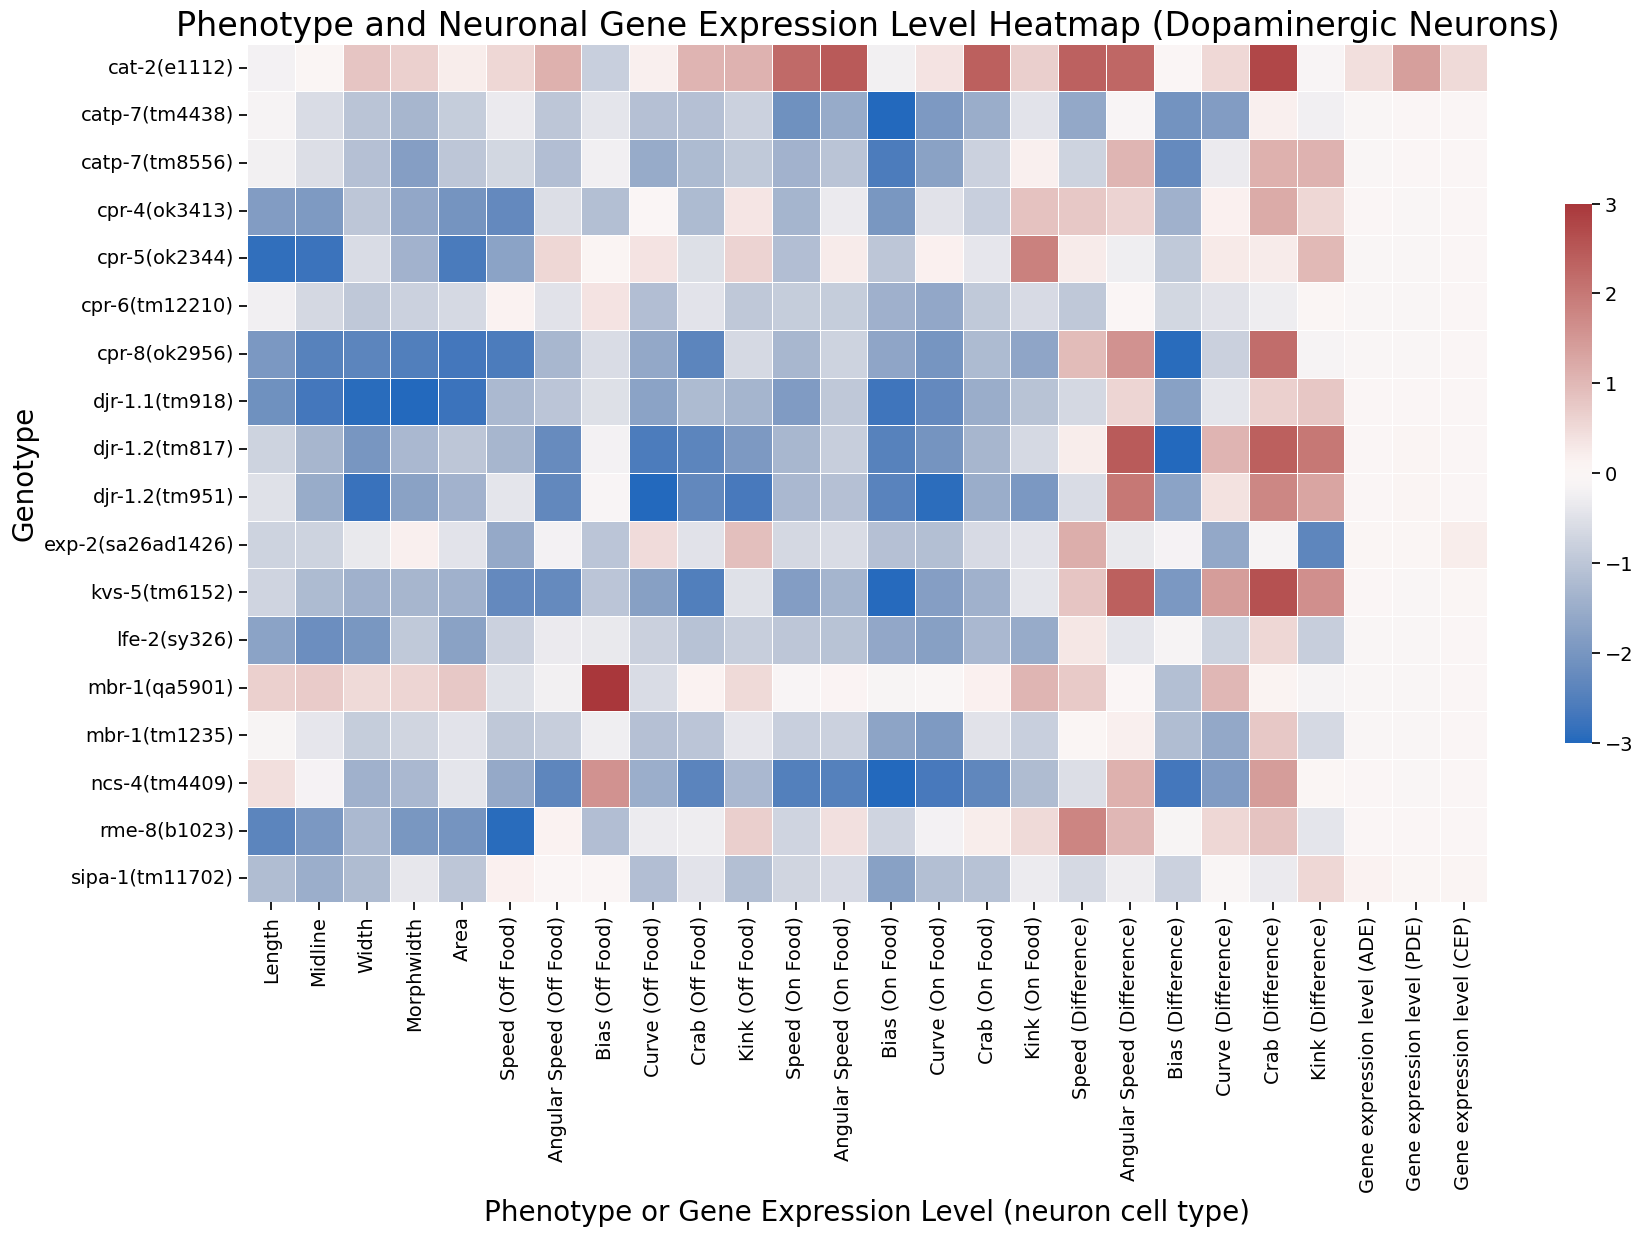

In [95]:
sns.set_context('notebook')
plt.figure(figsize = (20,14))
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14) 
ax = sns.heatmap(data = MergedDopaminergicNeurons_df, 
                 annot = False, 
                 linewidth = 0.5, 
                 square = True, 
                 cmap = "vlag", 
                 center = 0, 
                 vmax = 3,
                 vmin = -3, 
                 # xticklabels = 1,
                 xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                                'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                                'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                                'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                                'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)',
                                'Speed (Difference)', 'Angular Speed (Difference)', 'Bias (Difference)',
                                'Curve (Difference)', 'Crab (Difference)', 'Kink (Difference)', 
                                'Gene expression level (ADE)', 'Gene expression level (PDE)',
                               'Gene expression level (CEP)'],
                 yticklabels = 1,
                 cbar_kws = {"shrink": .5,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('Genotype', fontsize = 20)
ax.set_xlabel('Phenotype or Gene Expression Level (neuron cell type)', fontsize = 20)
ax.set_title('Phenotype and Neuronal Gene Expression Level Heatmap (Dopaminergic Neurons)', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
plt.savefig('MergedDopaminergicNeurons_heatmap_normalized_square.jpg', format = 'jpg', dpi = 450, bbox_inches = "tight")
plt.show()

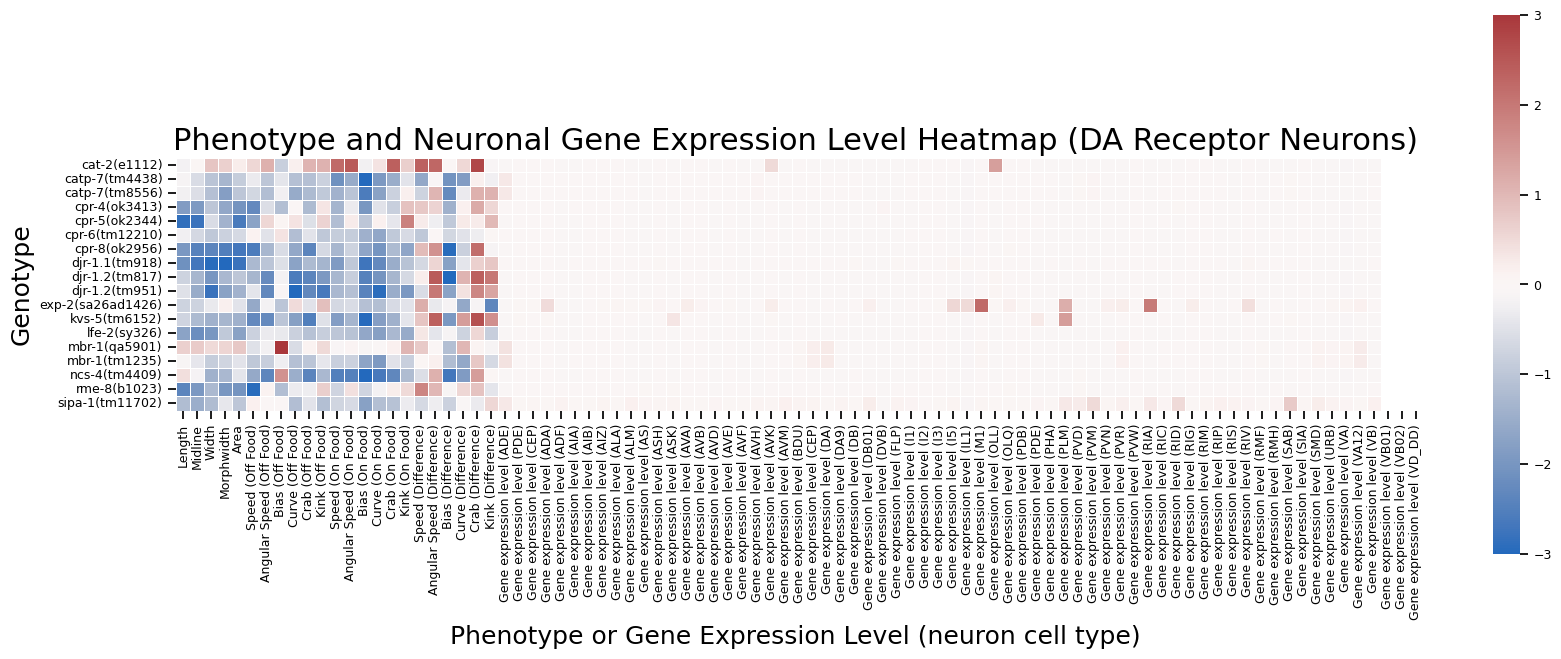

In [98]:
sns.set_context('notebook')
plt.figure(figsize = (20,14))
plt.rc('xtick', labelsize = 9)
plt.rc('ytick', labelsize = 9) 
ax = sns.heatmap(data = MergedDAReceptorNeurons_df, 
                 annot = False, 
                 linewidth = 0.5, 
                 square = True, 
                 cmap = "vlag", 
                 center = 0, 
                 vmax = 3,
                 vmin = -3, 
                 # xticklabels = 1,
                 xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                                'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                                'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                                'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                                'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)',
                                'Speed (Difference)', 'Angular Speed (Difference)', 'Bias (Difference)',
                                'Curve (Difference)', 'Crab (Difference)', 'Kink (Difference)', 'Gene expression level (ADE)', 'Gene expression level (PDE)', 'Gene expression level (CEP)',
 'Gene expression level (ADA)', 'Gene expression level (ADF)', 'Gene expression level (AIA)',
 'Gene expression level (AIB)', 'Gene expression level (AIZ)', 'Gene expression level (ALA)',
 'Gene expression level (ALM)', 'Gene expression level (AS)', 'Gene expression level (ASH)',
 'Gene expression level (ASK)', 'Gene expression level (AVA)', 'Gene expression level (AVB)',
 'Gene expression level (AVD)', 'Gene expression level (AVE)', 'Gene expression level (AVF)',
 'Gene expression level (AVH)', 'Gene expression level (AVK)', 'Gene expression level (AVM)',
 'Gene expression level (BDU)', 'Gene expression level (CEP)', 'Gene expression level (DA)',
 'Gene expression level (DA9)', 'Gene expression level (DB)', 'Gene expression level (DB01)',
 'Gene expression level (DVB)', 'Gene expression level (FLP)', 'Gene expression level (I1)',
 'Gene expression level (I2)', 'Gene expression level (I3)', 'Gene expression level (I5)',
 'Gene expression level (IL1)', 'Gene expression level (M1)', 'Gene expression level (OLL)',
 'Gene expression level (OLQ)', 'Gene expression level (PDB)', 'Gene expression level (PDE)',
 'Gene expression level (PHA)', 'Gene expression level (PLM)', 'Gene expression level (PVD)',
 'Gene expression level (PVM)', 'Gene expression level (PVN)', 'Gene expression level (PVR)',
 'Gene expression level (PVW)', 'Gene expression level (RIA)', 'Gene expression level (RIC)',
 'Gene expression level (RID)', 'Gene expression level (RIG)', 'Gene expression level (RIM)',
 'Gene expression level (RIP)', 'Gene expression level (RIS)', 'Gene expression level (RIV)',
 'Gene expression level (RMF)', 'Gene expression level (RMH)', 'Gene expression level (SAB)',
 'Gene expression level (SIA)', 'Gene expression level (SMD)', 'Gene expression level (URB)',
 'Gene expression level (VA)', 'Gene expression level (VA12)', 'Gene expression level (VB)',
 'Gene expression level (VB01)', 'Gene expression level (VB02)', 'Gene expression level (VD_DD)'],
                 yticklabels = 1,
                 cbar_kws = {"shrink": .5,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('Genotype', fontsize = 18)
ax.set_xlabel('Phenotype or Gene Expression Level (neuron cell type)', fontsize = 18)
ax.set_title('Phenotype and Neuronal Gene Expression Level Heatmap (DA Receptor Neurons)', fontsize = 22)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
plt.savefig('MergedDAReceptorNeurons_heatmap_normalized_square.jpg', format = 'jpg', dpi = 450, bbox_inches = "tight")
plt.show()

### 3.3 - use StandardScaler to standardize and normalize the distribution of each column (phenotype measure or neuron cell type) to mean = 0 and SD = 1; important step to properly scale data before clustering

In [34]:
from sklearn.preprocessing import StandardScaler

data = MergedDopaminergicNeurons_df
scaler = StandardScaler().fit(data)

# Transform (normalize) data to have mean = 0, SD = 1
scaled_data = scaler.transform(data)

# print(scaled_data.mean(axis=0))
# print(scaled_data.std(axis=0))

# Create a new DataFrame with the transformed data
MergedDopaminergicNeurons_scaled_df = pd.DataFrame(data=scaled_data, 
                                                   columns=MergedDopaminergicNeurons_df.columns, 
                                                   index=MergedDopaminergicNeurons_df.index)

# Save the merged DataFrame as a CSV file to a specific directory
MergedDopaminergicNeurons_scaled_df.to_csv('C:\\Users\\chris\\Desktop\\Rankin_Lab\\valid_data\\MergedDopaminergicNeurons_scaled_df.csv', index=True)

print(MergedDopaminergicNeurons_scaled_df)

                     length   midline     width  morphwidth      area  \
Genotype                                                                
cat-2(e1112)       0.749425  1.305501  2.128897    1.869969  1.476677   
catp-7(tm4438)     0.793353  0.650762  0.186369   -0.160586  0.334921   
catp-7(tm8556)     0.722607  0.706474  0.109481   -0.677416  0.220972   
cpr-4(ok3413)     -0.957153 -0.716039  0.234892   -0.477973 -0.874195   
cpr-5(ok2344)     -1.978089 -1.616487  0.662516   -0.236906 -1.480820   
cpr-6(tm12210)     0.702888  0.573031  0.260175    0.376550  0.589157   
cpr-8(ok2956)     -1.044837 -1.276644 -1.206996   -1.417061 -1.538651   
djr-1.1(tm918)    -1.226943 -1.530899 -1.783153   -2.085289 -1.644756   
djr-1.2(tm817)     0.169282 -0.112686 -0.805001   -0.110346  0.200677   
djr-1.2(tm951)     0.433269 -0.319474 -1.638986   -0.620473 -0.213204   
exp-2(sa26ad1426)  0.170790  0.464570  0.896111    1.392430  0.776788   
kvs-5(tm6152)      0.187384 -0.019837 -0.207493   -

### Generate heatmap with scaled data

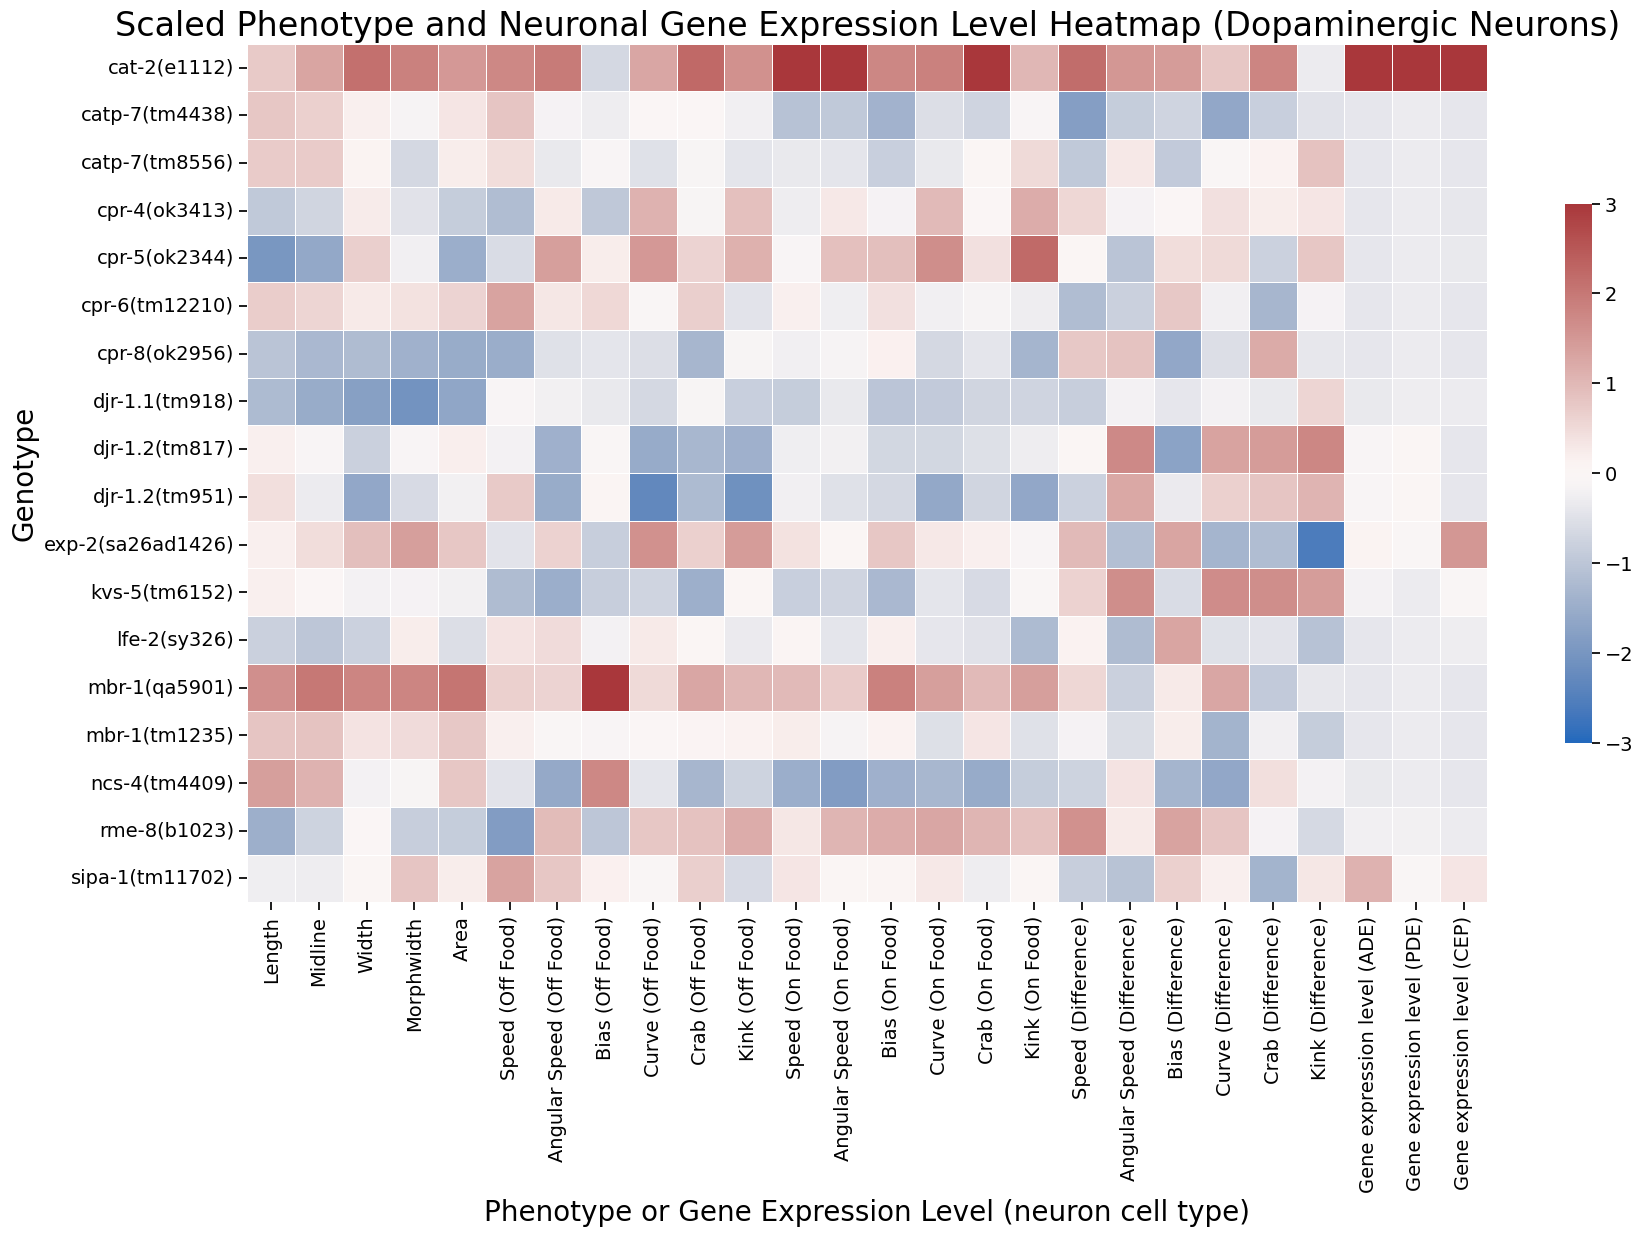

In [71]:
sns.set_context('notebook')
plt.figure(figsize = (20,14))
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14) 
ax = sns.heatmap(data = MergedDopaminergicNeurons_scaled_df, 
                 annot = False, 
                 linewidth = 0.5, 
                 square = True, 
                 cmap = "vlag", 
                 center = 0, 
                 vmax = 3,
                 vmin = -3, 
                 # xticklabels = 1,
                 xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                                'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                                'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                                'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                                'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)',
                                'Speed (Difference)', 'Angular Speed (Difference)', 'Bias (Difference)',
                                'Curve (Difference)', 'Crab (Difference)', 'Kink (Difference)', 
                                'Gene expression level (ADE)', 'Gene expression level (PDE)',
                               'Gene expression level (CEP)'],
                 yticklabels = 1,
                 cbar_kws = {"shrink": .5,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('Genotype', fontsize = 20)
ax.set_xlabel('Phenotype or Gene Expression Level (neuron cell type)', fontsize = 20)
ax.set_title('Scaled Phenotype and Neuronal Gene Expression Level Heatmap (Dopaminergic Neurons)', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
plt.savefig('MergedDopaminergicNeurons_SCALEDheatmap_normalized_square.jpg', format = 'jpg', dpi = 450, bbox_inches = "tight")
plt.show()

In [99]:
from sklearn.preprocessing import StandardScaler

data = MergedDAReceptorNeurons_df
scaler = StandardScaler().fit(data)

# Transform (normalize) data to have mean = 0, SD = 1
scaled_data = scaler.transform(data)

# print(scaled_data.mean(axis=0))
# print(scaled_data.std(axis=0))

# Create a new DataFrame with the transformed data
MergedDAReceptorNeurons_scaled_df = pd.DataFrame(data=scaled_data, 
                                                   columns=MergedDAReceptorNeurons_df.columns, 
                                                   index=MergedDAReceptorNeurons_df.index)

# Save the merged DataFrame as a CSV file to a specific directory
MergedDAReceptorNeurons_scaled_df.to_csv('C:\\Users\\chris\\Desktop\\Rankin_Lab\\valid_data\\MergedDAReceptorNeurons_scaled_df.csv', index=True)

print(MergedDAReceptorNeurons_scaled_df)

                     length   midline     width  morphwidth      area  \
Genotype                                                                
cat-2(e1112)       0.749425  1.305501  2.128897    1.869969  1.476677   
catp-7(tm4438)     0.793353  0.650762  0.186369   -0.160586  0.334921   
catp-7(tm8556)     0.722607  0.706474  0.109481   -0.677416  0.220972   
cpr-4(ok3413)     -0.957153 -0.716039  0.234892   -0.477973 -0.874195   
cpr-5(ok2344)     -1.978089 -1.616487  0.662516   -0.236906 -1.480820   
cpr-6(tm12210)     0.702888  0.573031  0.260175    0.376550  0.589157   
cpr-8(ok2956)     -1.044837 -1.276644 -1.206996   -1.417061 -1.538651   
djr-1.1(tm918)    -1.226943 -1.530899 -1.783153   -2.085289 -1.644756   
djr-1.2(tm817)     0.169282 -0.112686 -0.805001   -0.110346  0.200677   
djr-1.2(tm951)     0.433269 -0.319474 -1.638986   -0.620473 -0.213204   
exp-2(sa26ad1426)  0.170790  0.464570  0.896111    1.392430  0.776788   
kvs-5(tm6152)      0.187384 -0.019837 -0.207493   -

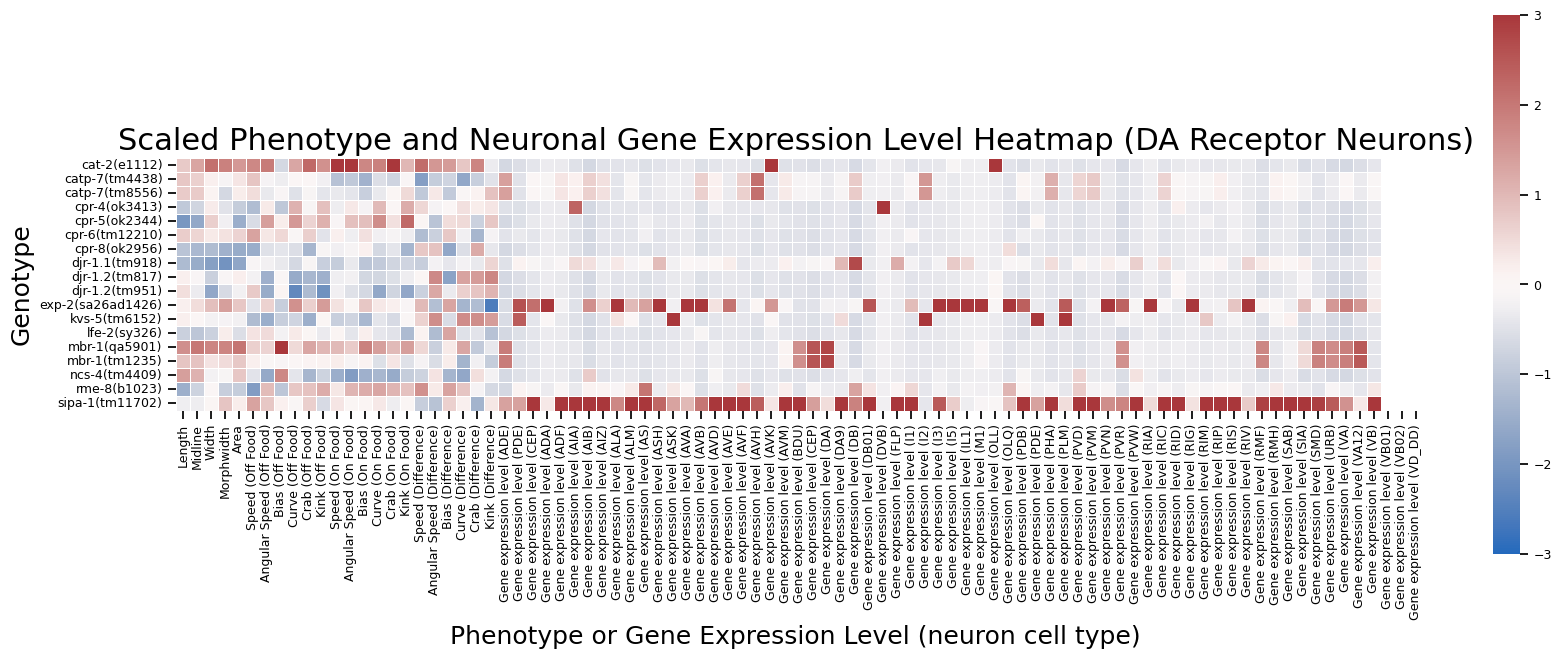

In [100]:
sns.set_context('notebook')
plt.figure(figsize = (20,14))
plt.rc('xtick', labelsize = 9)
plt.rc('ytick', labelsize = 9) 
ax = sns.heatmap(data = MergedDAReceptorNeurons_scaled_df, 
                 annot = False, 
                 linewidth = 0.5, 
                 square = True, 
                 cmap = "vlag", 
                 center = 0, 
                 vmax = 3,
                 vmin = -3, 
                 # xticklabels = 1,
                 xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                                'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                                'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                                'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                                'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)',
                                'Speed (Difference)', 'Angular Speed (Difference)', 'Bias (Difference)',
                                'Curve (Difference)', 'Crab (Difference)', 'Kink (Difference)', 'Gene expression level (ADE)', 'Gene expression level (PDE)', 'Gene expression level (CEP)',
 'Gene expression level (ADA)', 'Gene expression level (ADF)', 'Gene expression level (AIA)',
 'Gene expression level (AIB)', 'Gene expression level (AIZ)', 'Gene expression level (ALA)',
 'Gene expression level (ALM)', 'Gene expression level (AS)', 'Gene expression level (ASH)',
 'Gene expression level (ASK)', 'Gene expression level (AVA)', 'Gene expression level (AVB)',
 'Gene expression level (AVD)', 'Gene expression level (AVE)', 'Gene expression level (AVF)',
 'Gene expression level (AVH)', 'Gene expression level (AVK)', 'Gene expression level (AVM)',
 'Gene expression level (BDU)', 'Gene expression level (CEP)', 'Gene expression level (DA)',
 'Gene expression level (DA9)', 'Gene expression level (DB)', 'Gene expression level (DB01)',
 'Gene expression level (DVB)', 'Gene expression level (FLP)', 'Gene expression level (I1)',
 'Gene expression level (I2)', 'Gene expression level (I3)', 'Gene expression level (I5)',
 'Gene expression level (IL1)', 'Gene expression level (M1)', 'Gene expression level (OLL)',
 'Gene expression level (OLQ)', 'Gene expression level (PDB)', 'Gene expression level (PDE)',
 'Gene expression level (PHA)', 'Gene expression level (PLM)', 'Gene expression level (PVD)',
 'Gene expression level (PVM)', 'Gene expression level (PVN)', 'Gene expression level (PVR)',
 'Gene expression level (PVW)', 'Gene expression level (RIA)', 'Gene expression level (RIC)',
 'Gene expression level (RID)', 'Gene expression level (RIG)', 'Gene expression level (RIM)',
 'Gene expression level (RIP)', 'Gene expression level (RIS)', 'Gene expression level (RIV)',
 'Gene expression level (RMF)', 'Gene expression level (RMH)', 'Gene expression level (SAB)',
 'Gene expression level (SIA)', 'Gene expression level (SMD)', 'Gene expression level (URB)',
 'Gene expression level (VA)', 'Gene expression level (VA12)', 'Gene expression level (VB)',
 'Gene expression level (VB01)', 'Gene expression level (VB02)', 'Gene expression level (VD_DD)'],
                 yticklabels = 1,
                 cbar_kws = {"shrink": .5,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('Genotype', fontsize = 18)
ax.set_xlabel('Phenotype or Gene Expression Level (neuron cell type)', fontsize = 18)
ax.set_title('Scaled Phenotype and Neuronal Gene Expression Level Heatmap (DA Receptor Neurons)', fontsize = 22)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
plt.savefig('MergedDAReceptorNeurons_SCALEDheatmap_normalized_square.jpg', format = 'jpg', dpi = 450, bbox_inches = "tight")
plt.show()